___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [821]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [822]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 300
pd.options.display.max_columns = 108

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")



## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [823]:
df1 = pd.read_csv('ANSUR II FEMALE Public.csv', encoding='latin-1')
df2 = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')

## Explore Data

In [824]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [825]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [826]:
df1.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [827]:
df2.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [828]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [829]:
df_c = pd.concat([df1, df2])

In [830]:
df_c.isnull().any()

subjectid                         False
abdominalextensiondepthsitting    False
acromialheight                    False
acromionradialelength             False
anklecircumference                False
axillaheight                      False
balloffootcircumference           False
balloffootlength                  False
biacromialbreadth                 False
bicepscircumferenceflexed         False
bicristalbreadth                  False
bideltoidbreadth                  False
bimalleolarbreadth                False
bitragionchinarc                  False
bitragionsubmandibulararc         False
bizygomaticbreadth                False
buttockcircumference              False
buttockdepth                      False
buttockheight                     False
buttockkneelength                 False
buttockpopliteallength            False
calfcircumference                 False
cervicaleheight                   False
chestbreadth                      False
chestcircumference                False


In [831]:
df_c[df_c.columns[df_c.isnull().any() == True]].columns

Index(['ethnicity'], dtype='object')

In [832]:
df_c.drop('ethnicity', inplace= True, axis=1)

In [833]:
df_c[df_c.columns[df_c.isnull().any() == True]].columns

Index([], dtype='object')

In [834]:
df_c.describe().T

count          mean           std      min  \
subjectid                       6068.0  20757.198418  13159.390894  10027.0   
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0   
acromialheight                  6068.0   1406.161338     79.091048   1115.0   
acromionradialelength           6068.0    327.374423     20.720018    249.0   
anklecircumference              6068.0    224.891397     16.051833    156.0   
axillaheight                    6068.0   1299.608767     72.022286   1038.0   
balloffootcircumference         6068.0    244.192650     16.845020    186.0   
balloffootlength                6068.0    194.754614     13.516368    151.0   
biacromialbreadth               6068.0    399.204186     30.236914    283.0   
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0   
bicristalbreadth                6068.0    274.735003     19.221034    197.0   
bideltoidbreadth                6068.0    490.754450     42.135535    357.0   
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0   
bitragionchinarc                6068.0    324.896506     17.087501    267.0   
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0   
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0   
buttockcircumference            6068.0   1020.084707     76.422643    737.0   
buttockdepth                    6068.0    241.619974     26.482986    168.0   
buttockheight                   6068.0    870.152274     54.822574    656.0   
buttockkneelength               6068.0    608.999176     33.792839    466.0   
buttockpopliteallength          6068.0    497.097561     29.082390    367.0   
calfcircumference               6068.0    386.041200     30.647180    266.0   
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   
chestbreadth                    6068.0    282.859097     20.659397    213.0   
chestcircumference              6068.0   1022.098879    100.671751    695.0   
chestdepth                      6068.0    251.738464     26.777843    170.0   
chestheight                     6068.0   1252.013184     79.583972    984.0   
crotchheight                    6068.0    825.110086     54.748240    610.0   
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0   
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0   
earbreadth                      6068.0     35.132169      3.231469     25.0   
earlength                       6068.0     62.625906      4.876264     46.0   
earprotrusion                   6068.0     22.263349      3.172715     13.0   
elbowrestheight                 6068.0    240.911338     28.509447    138.0   
eyeheightsitting                6068.0    785.914469     41.865795    654.0   
footbreadthhorizontal           6068.0     98.865359      6.657916     77.0   
footlength                      6068.0    263.033619     17.390971    198.0   
forearmcenterofgriplength       6068.0    338.766645     23.244742    258.0   
forearmcircumferenceflexed      6068.0    295.010712     30.049715    200.0   
forearmforearmbreadth           6068.0    552.075972     62.368049    376.0   
forearmhandlength               6068.0    467.007086     30.034820    342.0   
functionalleglength             6068.0   1102.049275     68.545784    835.0   
handbreadth                     6068.0     84.953362      6.346510     67.0   
handcircumference               6068.0    203.861404     15.551424    152.0   
handlength                      6068.0    189.286585     11.505788    145.0   
headbreadth                     6068.0    152.182762      6.235692    131.0   
headcircumference               6068.0    570.035267     18.291139    500.0   
headlength                      6068.0    196.334871      8.485374    168.0   
heelanklecircumference          6068.0    332.622940     22.460776    258.0   
heelbreadth                     6068.0     70.756922      5.932626     48.0   
hipb

In [835]:
df_c.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [836]:
df_c.stature

0       1560
1       1665
2       1711
3       1660
4       1572
        ... 
4077    1688
4078    1765
4079    1690
4080    1718
4081    1828
Name: stature, Length: 6068, dtype: int64

In [837]:
df_c.drop(['writingpreference', 'heightin', 'weightlbs', 'date', 'installation'], inplace= True, axis=1)

In [838]:
df_c.primarymos.value_counts().sum()

6068

In [839]:
df_c.drop(['primarymos','subjectid'], inplace= True, axis=1)

In [840]:
df_c.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271                      237   
3                 214          1250                      240   
4                 214          1210                      217   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               177                373                        315   
1               178                372                        272   
2               196                397                        300   
3               188                384                        364   
4               182                378                        320   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               263               466                  65               338   
1               250               430                  64               294   
2               276               450                  69               309   
3               276               484                  68               340   
4               336               525                  67               300   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        301                 141                  1011   
1                        270                 126                   893   
2                        270                 128                   987   
3                        294                 144                  1012   
4                        295                 135                  1281   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           223            836                587                     476   
1           186            900                583                     483   
2           204            861                583                     466   
3           253            897                599                     471   
4           284            811                607                     467   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                360             1336           274                 922   
1                350             1440           261                 839   
2                384             1451           287                 874   
3                372             1430           269                1008   
4                433             1362           305                1089   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         245         1095           759                    557   
1         206         1234           835                    549   
2         223         1226           821                    643   
3         285         1170           804                    640   
4         290         1112           726                    686   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             310          35         65             16   
1                             329          32         60             23   
2                             374          36         65             26   
3                             351          38         62             22   
4                             356          34         65             18   

   elbowrestheight  eyeheightsitting  footbreadthhorizonta

In [841]:
df_c.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [842]:
df_c = df_c[(df_c.dodrace == 1) | (df_c.dodrace == 2) | (df_c.dodrace == 3)]

In [843]:
df_c

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
4077                             235            1353                    312   
4078                             247            1473                    336   
4079                             264            1394                    313   
4080                             203            1417                    327   
4081                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
4077                 216          1263                      228   
4078                 234          1346                      253   
4079                 227          1280                      245   
4080                 223          1314                      250   
4081                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
4077               193                384                        318   
4078               196                428                        374   
4079               193                407                        367   
4080               196                419                        365   
4081               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
4077               241               457                  70   
4078               284               536                  76   
4079               271               501                  74   
4080               271               493                  75   
4081               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
4077               321                        301                 137   
4078               319            

In [844]:
df_c[df_c.subjectnumericrace == 8]

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
3                                261            1356                    306   
61                               286            1391                    341   
87                               246            1328                    317   
93                               187            1355                    319   
142                              242            1302                    297   
180                              213            1251                    274   
184                              225            1316                    290   
186                              207            1351                    324   
232                              239            1366                    329   
309                              265            1396                    321   
310                              246            1400                    325   
502                              256            1440                    325   
511                              197            1394                    319   
634                              256            1318                    311   
694                              184            1345                    316   
710                              213            1373                    322   
721                              228            1313                    299   
747                              230            1407                    335   
802                              224            1349                    314   
810                              220            1302                    310   
829                              214            1371                    324   
830                              231            1341                    312   
852                              248            1408                    323   
881                              219            1409                    332   
895                              215            1409                    333   
967                              296            1345                    304   
993                              268            1339                    321   
1007                             197            1383                    319   
1022                             230            1320                    304   
1059                             220            1449                    318   
1077                             223            1398                    330   
1080                             205            1403                    342   
1171                             203            1425                    327   
1372                             257            1292                    304   
1389                             215            1372                    318   
1407                             233            1379                    328   
1474                             197            1346                    308   
1508                             232            1312                    294   
1546                             185            1277                    304   
1566                             280            1330                    318   
1596                             195            1435                    326   
1611                             353            1438                    338   
1627                             252            1358                    313   
1629                             267            1380                    314   
1630                             235            1370                    328   
1657                             253            1477                    338   
1762                             245            1389                    342   
1778                             244            1290                    296   
1807                             247            1402                    325   
148                              240            1512    

In [845]:
df_c.drop(['subjectnumericrace'], inplace= True, axis=1)

In [846]:
df_c

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
4077                             235            1353                    312   
4078                             247            1473                    336   
4079                             264            1394                    313   
4080                             203            1417                    327   
4081                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
4077                 216          1263                      228   
4078                 234          1346                      253   
4079                 227          1280                      245   
4080                 223          1314                      250   
4081                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
4077               193                384                        318   
4078               196                428                        374   
4079               193                407                        367   
4080               196                419                        365   
4081               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
4077               241               457                  70   
4078               284               536                  76   
4079               271               501                  74   
4080               271               493                  75   
4081               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
4077               321                        301                 137   
4078               319            

In [847]:
df_c.groupby('dodrace').component.value_counts()

dodrace  component          
1        Army National Guard    1855
         Regular Army           1823
         Army Reserve            114
2        Regular Army            747
         Army National Guard     499
         Army Reserve             52
3        Regular Army            385
         Army National Guard     253
         Army Reserve             41
Name: count, dtype: int64

In [848]:
df_c.groupby('dodrace').branch.value_counts()

dodrace  branch                
1        Combat Service Support    1911
         Combat Arms               1146
         Combat Support             735
2        Combat Service Support     745
         Combat Support             380
         Combat Arms                173
3        Combat Service Support     365
         Combat Arms                189
         Combat Support             125
Name: count, dtype: int64

In [849]:
df_c.drop(['branch'], inplace= True, axis=1)

In [850]:
df_c

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
4077                             235            1353                    312   
4078                             247            1473                    336   
4079                             264            1394                    313   
4080                             203            1417                    327   
4081                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
4077                 216          1263                      228   
4078                 234          1346                      253   
4079                 227          1280                      245   
4080                 223          1314                      250   
4081                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
4077               193                384                        318   
4078               196                428                        374   
4079               193                407                        367   
4080               196                419                        365   
4081               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
4077               241               457                  70   
4078               284               536                  76   
4079               271               501                  74   
4080               271               493                  75   
4081               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
4077               321                        301                 137   
4078               319            

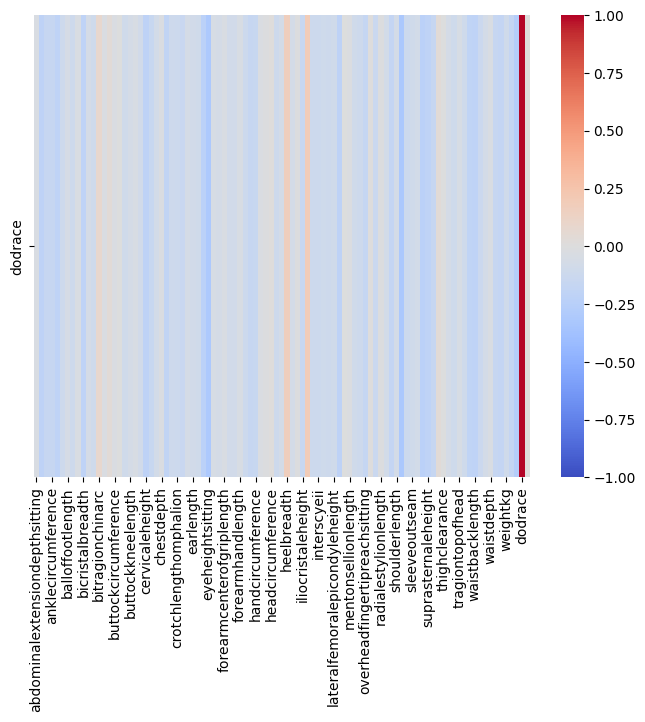

In [851]:
plt.figure(figsize=(8,6))
sns.heatmap(df_c.drop(['component', 'gender', 'subjectsbirthlocation'], axis=1).corr().loc[['dodrace'], :],vmin=-1, vmax=1, annot=False, cmap="coolwarm");

In [852]:
df_c.drop(['component', 'gender', 'subjectsbirthlocation'], axis=1).corr().loc[['dodrace'], :]

abdominalextensiondepthsitting  acromialheight  \
dodrace                        -0.03186       -0.217393   

         acromionradialelength  anklecircumference  axillaheight  \
dodrace              -0.158561           -0.157784     -0.205576   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
dodrace                -0.111249         -0.059867          -0.113701   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
dodrace                  -0.031438         -0.203874         -0.070197   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
dodrace           -0.107319          0.083263                  -0.024195   

         bizygomaticbreadth  buttockcircumference  buttockdepth  \
dodrace            0.032559             -0.025066     -0.001344   

         buttockheight  buttockkneelength  buttockpopliteallength  \
dodrace      -0.098933          -0.066708               -0.043794   

         calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
dodrace          -0.091895        -0.215708     -0.155248           -0.082658   

         chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
dodrace     -0.0265    -0.193294     -0.110503              -0.117393   

         crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
dodrace                       -0.141253   -0.064213  -0.089557      -0.097392   

         elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
dodrace        -0.227899         -0.319669              -0.052488   -0.070001   

         forearmcenterofgriplength  forearmcircumferenceflexed  \
dodrace                  -0.033631                   -0.087857   

         forearmforearmbreadth  forearmhandlength  functionalleglength  \
dodrace               -0.08792          -0.039746            -0.123926   

         handbreadth  handcircumference  handlength  headbreadth  \
dodrace    -0.158999           -0.14981   -0.026917    -0.008958   

         headcircumference  headlength  heelanklecircumference  heelbreadth  \
dodrace           0.009739   -0.110228               -0.071767     0.166804   

         hipbreadth  hipbreadthsitting  iliocristaleheight  \
dodrace   -0.072728          -0.013892           -0.153345   

         interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
dodrace               0.194548   -0.122464    -0.123949             -0.105427   

         kneeheightsitting  lateralfemoralepicondyleheight  \
dodrace          -0.116094                       -0.094265   

         lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
dodrace                -0.21844                -0.003629            -0.018517   

         neckcircumference  neckcircumferencebase  \
dodrace          -0.099779              -0.114156   

         overheadfingertipreachsitting  palmlength  poplitealheight  \
dodrace                       -0.16965    0.001644        -0.132913   

         radialestylionlength  shouldercircumference  shoulderelbowlength  \
dodrace             -0.015375              -0.078641            -0.179681   

         shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  \
dodrace       -0.077721      -0.324329                -0.12357      -0.100337   

             span   stature  suprasternaleheight  tenthribheight  \
dodrace -0.078834 -0.232736             -0.20379       -0.158044   

         thighcircumference  thighclearance  thumbtipreach  tibialheight  \
dodrace            0.032906        -0.00057      -0.065669     -0.107715   

         tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  \
dodrace         -0.050268             -0.10476                      -0.196206   

         waistbacklength  waistbreadth  waistcircumference  waistdepth  \
dodrace        -0.208262     -0.125099           -0.071195   -0.031391   

         waistfrontlengthsitting  waistheightomphalion  weightkg  \
do

In [853]:
df_c.drop(['buttockdepth', 'headbreadth', 'headcircumference', 'lowerthighcircumference', 'palmlength', 'thighclearance'], inplace= True, axis=1)

In [854]:
df_c.drop(['component', 'gender', 'subjectsbirthlocation'], axis=1).corr().loc[['dodrace'], :] < -0.02

abdominalextensiondepthsitting  acromialheight  \
dodrace                            True            True   

         acromionradialelength  anklecircumference  axillaheight  \
dodrace                   True                True          True   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
dodrace                     True              True               True   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
dodrace                       True              True              True   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
dodrace                True             False                       True   

         bizygomaticbreadth  buttockcircumference  buttockheight  \
dodrace               False                  True           True   

         buttockkneelength  buttockpopliteallength  calfcircumference  \
dodrace               True                    True               True   

         cervicaleheight  chestbreadth  chestcircumference  chestdepth  \
dodrace             True          True                True        True   

         chestheight  crotchheight  crotchlengthomphalion  \
dodrace         True          True                   True   

         crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
dodrace                            True        True       True           True   

         elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
dodrace             True              True                   True        True   

         forearmcenterofgriplength  forearmcircumferenceflexed  \
dodrace                       True                        True   

         forearmforearmbreadth  forearmhandlength  functionalleglength  \
dodrace                   True               True                 True   

         handbreadth  handcircumference  handlength  headlength  \
dodrace         True               True        True        True   

         heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  \
dodrace                    True        False        True              False   

         iliocristaleheight  interpupillarybreadth  interscyei  interscyeii  \
dodrace                True                  False        True         True   

         kneeheightmidpatella  kneeheightsitting  \
dodrace                  True               True   

         lateralfemoralepicondyleheight  lateralmalleolusheight  \
dodrace                            True                    True   

         mentonsellionlength  neckcircumference  neckcircumferencebase  \
dodrace                False               True                   True   

         overheadfingertipreachsitting  poplitealheight  radialestylionlength  \
dodrace                           True             True                 False   

         shouldercircumference  shoulderelbowlength  shoulderlength  \
dodrace                   True                 True            True   

         sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  \
dodrace           True                    True           True  True     True   

         suprasternaleheight  tenthribheight  thighcircumference  \
dodrace                 True            True               False   

         thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
dodrace           True          True              True                 True   

         verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
dodrace                           True             True          True   

         waistcircumference  waistdepth  waistfrontlengthsitting  \
dodrace                True        True                     True   

         waistheightomphalion  weightkg  wristcircumference  wristheight  \
dodrace                  True      True                True         True   

         dodrace    age  
dodrace    False  False

In [855]:
df_c.drop(['mentonsellionlength'], inplace= True, axis=1)

<Axes: xlabel='age', ylabel='Count'>

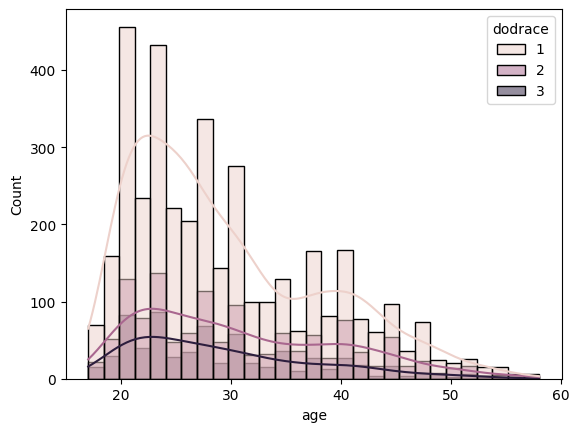

In [856]:
sns.histplot(x=df_c.age ,hue=df_c.dodrace, kde=True)

<Axes: xlabel='age', ylabel='Density'>

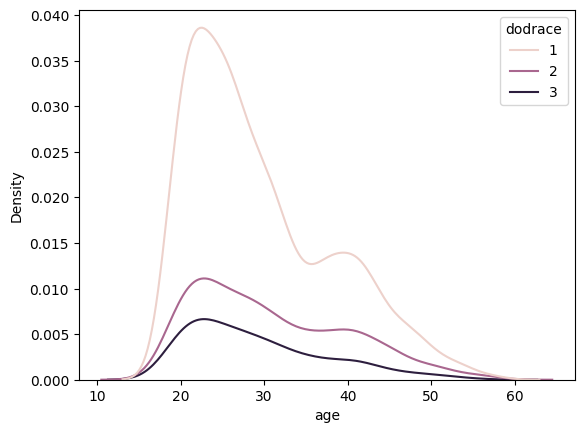

In [857]:
sns.kdeplot(x=df_c.age ,hue=df_c.dodrace)

<Axes: xlabel='age'>

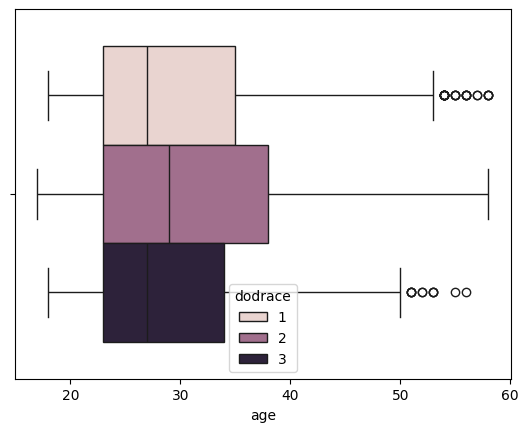

In [858]:
sns.boxplot(x=df_c.age, hue=df_c.dodrace)

<Axes: xlabel='dodrace', ylabel='count'>

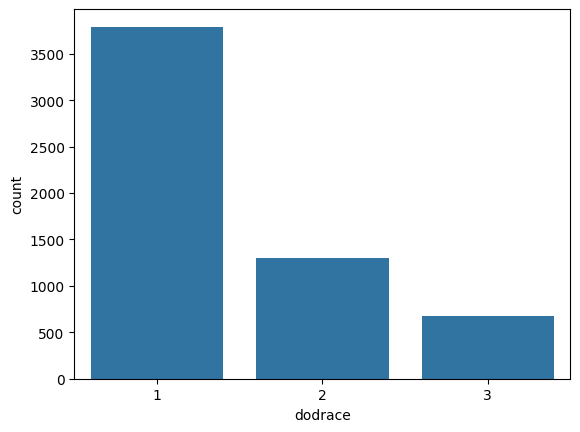

In [859]:
sns.countplot(x=df_c.dodrace)

In [860]:
df_c

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
4077                             235            1353                    312   
4078                             247            1473                    336   
4079                             264            1394                    313   
4080                             203            1417                    327   
4081                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
4077                 216          1263                      228   
4078                 234          1346                      253   
4079                 227          1280                      245   
4080                 223          1314                      250   
4081                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
4077               193                384                        318   
4078               196                428                        374   
4079               193                407                        367   
4080               196                419                        365   
4081               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
4077               241               457                  70   
4078               284               536                  76   
4079               271               501                  74   
4080               271               493                  75   
4081               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
4077               321                        301                 137   
4078               319            

In [861]:
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Hispanic'
}
df_c['dodrace'] = df_c['dodrace'].map(race_mapping)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [862]:
X=df_c.drop(["dodrace"], axis=1)
y=df_c["dodrace"]

In [863]:
from sklearn.model_selection import train_test_split

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

In [865]:
scl_or_col = ['gender', 'component']
scl_one_col = ['subjectsbirthlocation']


In [866]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [867]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[['Female','Male'],['Army National Guard','Regular Army','Army Reserve']])
onehot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)

In [868]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, scl_or_col),
        ('onehot', onehot_encoder, scl_one_col)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [869]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [870]:
log_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]
)

log_p = log_p.set_output(transform='pandas')

In [871]:
log_p.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'Reserve']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'component']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['subjectsbirthlocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [872]:
y_pred = log_p.predict(X_test)

In [873]:
y_pred_proba = log_p.predict_proba(X_test)
y_pred_proba

array([[1.27303777e-04, 8.31371791e-01, 1.68500905e-01],
       [4.54884227e-03, 5.30308539e-02, 9.42420304e-01],
       [6.95913772e-03, 9.84386860e-01, 8.65400210e-03],
       ...,
       [9.73447893e-01, 1.87098334e-02, 7.84227371e-03],
       [1.47411355e-02, 3.84769946e-02, 9.46781870e-01],
       [5.45015349e-04, 2.38321789e-05, 9.99431152e-01]])

In [874]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of belonging to class 1
test_data.sample(10)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
3569                             280            1434                    337   
1585                             190            1375                    315   
1963                             173            1300                    290   
1203                             293            1489                    338   
1239                             239            1340                    319   
1680                             287            1370                    322   
682                              392            1442                    322   
845                              209            1408                    319   
1083                             238            1374                    306   
1035                             223            1494                    327   

      anklecircumference  axillaheight  balloffootcircumference  \
3569                 240          1313                      261   
1585                 214          1265                      238   
1963                 207          1211                      215   
1203                 237          1364                      252   
1239                 227          1239                      227   
1680                 210          1277                      224   
682                  257          1328                      273   
845                  238          1302                      261   
1083                 212          1268                      228   
1035                 224          1373                      257   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
3569               193                421                        361   
1585               183                372                        281   
1963               174                345                        274   
1203               202                439                        385   
1239               180                364                        354   
1680               184                359                        338   
682                211                436                        450   
845                190                412                        349   
1083               190                372                        297   
1035               198                420                        368   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
3569               263               513                  70   
1585               263               442                  66   
1963               265               407                  64   
1203               297               539                  75   
1239               247               447                  64   
1680               296               492                  62   
682                314               600                  85   
845                257               494                  80   
1083               290               468                  67   
1035               290               513                  78   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
3569               332                        311                 140   
1585               290                        268                 134   
1963               293                        261                 130   
1203               328                        327                 149   
1239               316                        296                 132   
1680               309                        305                 131   
682                364                        340                 160   
845                322                        298                 140   
1083               316                        298                 136   
1035               344                        313                 144   

      buttockcircumference  buttockheight  buttockkneelength  \
3569                  1017      

In [875]:
from sklearn.metrics import confusion_matrix, classification_report

In [876]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [877]:
eval_metric(log_p, X_train, y_train, X_test, y_test)

Test_Set
[[243   5  12]
 [ 11  78  47]
 [  9  25 724]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       260
    Hispanic       0.72      0.57      0.64       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 978    9   51]
 [  22  357  164]
 [  31   69 2934]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.95      1038
    Hispanic       0.82      0.66      0.73       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.90      0.86      0.87      4615
weighted avg       0.92      0.93      0.92      4615



In [878]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

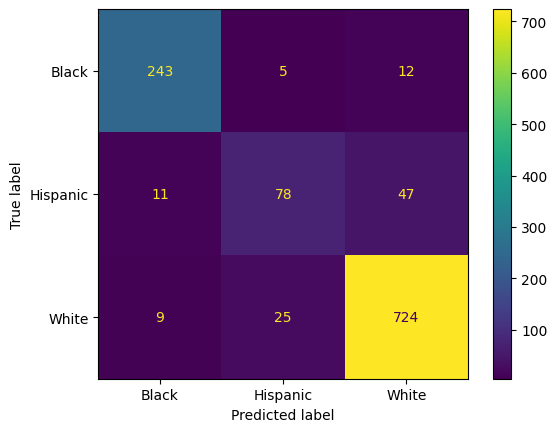

In [879]:
ConfusionMatrixDisplay.from_estimator(log_p, X_test, y_test);

In [880]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold


In [881]:
cv = StratifiedKFold(n_splits=10)

scores = cross_validate(log_p, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.901625
train_accuracy              0.925533
test_precision_weighted     0.897529
train_precision_weighted    0.923062
test_recall_weighted        0.901625
train_recall_weighted       0.925533
test_f1_weighted            0.897967
train_f1_weighted           0.922988
dtype: float64

In [882]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, average = 'micro', pos_label = 'Hispanic', labels =["Hispanic"],)
precision_0 = make_scorer(precision_score, average = 'micro', pos_label = 'Hispanic',labels =["Hispanic"])
recall_0 = make_scorer(recall_score, average = 'micro', pos_label = 'Hispanic',labels =["Hispanic"])

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [883]:
cv = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets


scores = cross_validate(log_p, X_train, y_train,
                        scoring= scoring, 
                        cv=cv,
                        return_train_score=True,)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]


test_precision_0     0.746731
train_precision_0    0.823338
test_recall_0        0.587576
train_recall_0       0.659502
test_f1_0            0.656717
train_f1_0           0.732320
dtype: float64

### Logistic Model GridsearchCV

In [884]:
from sklearn.model_selection import GridSearchCV

In [885]:
log_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=15000))]
)

grid_p = log_p.set_output(transform='pandas')

In [886]:
'''f1_Hispanic = make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])'''

'f1_Hispanic = make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"])\nprecision_Hispanic = make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"])\nrecall_Hispanic = make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])'

In [887]:
penalty = ["l1", "l2"]
C = [0.01, 0.05, 0.07, 0.1]
class_weight= ["balanced", None]

solver = ["lbfgs", "liblinear"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver": solver}


In [888]:
grid_model = GridSearchCV(grid_p, param_grid = param_grid, scoring=recall_0, cv=5,return_train_score=True)

# scoring recall yapınca lbfgs solver l1 kullanılamıyor uzun sürdüğü için solver yapılmadı.

In [889]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'Reserve']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'component']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_un...
                                       ('logistic',
                                        LogisticRegression(max_iter=15000))]),
             param_grid={'logistic__C': [0.01, 0.05, 0.07, 0.1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', average=micro, pos_label=Hispanic, labels=['Hispanic']))

In [890]:
grid_model.best_params_

{'logistic__C': 0.05,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [891]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'Reserve']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'component']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['subjectsbirthlocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight='balanced',
                                    max_iter=15000))])

In [892]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773496
mean_train_score    0.856813
Name: 10, dtype: object

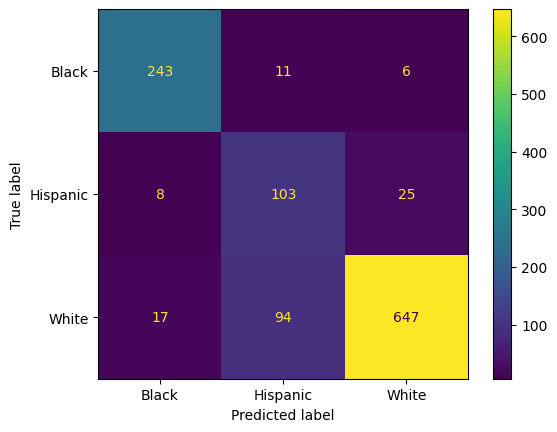

In [893]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [894]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[243  11   6]
 [  8 103  25]
 [ 17  94 647]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   38   32]
 [  16  460   67]
 [  67  342 2625]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



scikit-plot yüklemekte sorun yaşadığım için roc curves ve precision recall curve görüntüleyip doğruluk eğrisini görüüntüleyemedim. 

Metric kütüphanesi kullanılarak scoru yazdırıldı.

In [895]:
'''
grid_model.fit(X_train, y_train)

y_pred_proba = grid_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

'''

NameError: name 'plot_roc' is not defined

In [896]:
y_pred_proba = grid_model.predict_proba(X_test)

In [897]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9083193690049693

In [ ]:
'''
grid_model.fit(X_train, y_train)

y_pred_proba = grid_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

'''

In [898]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6667516961100459

In [899]:
y_pred = grid_model.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [900]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

In [901]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import classification_report,confusion_matrix

In [902]:
scv_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
)

scv_p = scv_p.set_output(transform='pandas')

In [903]:
scv_p.fit(X_train, y_train)
eval_metric(scv_p, X_train, y_train, X_test, y_test)

Test_Set
[[236   1  23]
 [ 11  57  68]
 [  8   8 742]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.86      0.42      0.56       136
       White       0.89      0.98      0.93       758

    accuracy                           0.90      1154
   macro avg       0.89      0.77      0.80      1154
weighted avg       0.90      0.90      0.89      1154


Train_Set
[[ 953    5   80]
 [  26  258  259]
 [  14   17 3003]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94      1038
    Hispanic       0.92      0.48      0.63       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.93      0.79      0.84      4615
weighted avg       0.92      0.91      0.90      4615



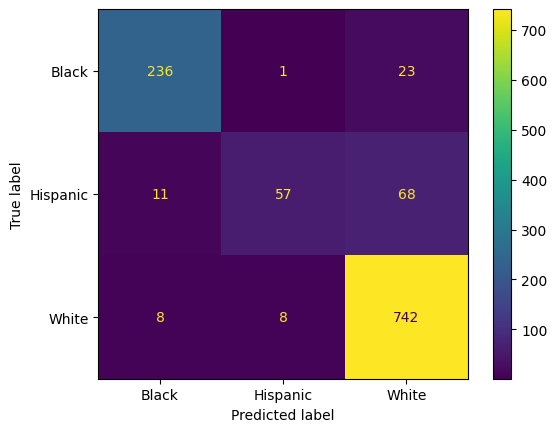

In [904]:
ConfusionMatrixDisplay.from_estimator(scv_p, X_test, y_test);

In [ ]:
PrecisionRecallDisplay.from_estimator(scv_p, X_test, y_test);

ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.

In [905]:
y_pred_proba = scv_p.predict_proba(X_test)

In [906]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6837349864306451

In [907]:
cv = StratifiedKFold(n_splits=10)

scores = cross_validate(scv_p,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = cv,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.888621
train_accuracy              0.912459
test_precision_weighted     0.890069
train_precision_weighted    0.914987
test_recall_weighted        0.888621
train_recall_weighted       0.912459
test_f1_weighted            0.875901
train_f1_weighted           0.903141
dtype: float64

In [908]:
cv = StratifiedKFold(n_splits=10)

scores = cross_validate(scv_p,
                        X_train,
                        y_train,
                        scoring=recall_0,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.397744
train_score    0.468589
dtype: float64

###  SVC Model GridsearchCV

In [667]:
param_grid_b = {'SVC__C':[0.01,0.1,1],
              'SVC__kernel':['linear','rbf','poly'],
              'SVC__gamma':["scale", "auto"],
              'SVC__degree':[2,3],
              'SVC__class_weight': ["balanced", None]}

In [668]:
svm_model_grid_b = GridSearchCV(scv_p,
                              param_grid_b,
                              scoring=recall_0,
                              return_train_score=True)

In [669]:
svm_model_grid_b.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'Reserve']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'component']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown...
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__degree': [2, 3], 'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', average=micro, pos_label=Hispanic, labels=['Hispanic']))

In [137]:
svm_model_grid_b.best_params_

{'SVC__C': 0.01,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [141]:
param_grid = {'SVC__C': [0.001,0.005, 0.05, 0.1],
              'SVC__gamma': ['scale', 0.2, 0.3],
              'SVC__kernel': ['linear'],
              'SVC__class_weight': ['balanced'],
              'SVC__degree':[1 ,1.5]}

In [142]:
svm_model_grid = GridSearchCV(scv_p,
                              param_grid,
                              scoring='recall',
                              cv=10,
                              return_train_score=True)

In [143]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'Reserve']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'component']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_u...='ignore',
                                                                                       sparse_output=False),
                                                                         ['subjectsbirthlocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.005, 0.05, 0.1],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [1, 1.5],
                         'SVC__gamma': ['scale', 0.2, 0.3],
                         'SVC__kernel': ['linear']},
             return_train_score=True, scoring='recall')

In [ ]:
svm_model_grid.best_params_

{'SVC__C': 0.001,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 1,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [921]:
param_grid = {'SVC__C': [0.01, 0.05],
              'SVC__gamma': ['scale', 0.2, 0.3],
              'SVC__kernel': ['linear'],
              'SVC__class_weight': ['balanced'],
              'SVC__degree':[0, 0.5]}

In [922]:
svm_model_grid = GridSearchCV(scv_p,
                              param_grid,
                              scoring=recall_0,
                              cv=10,
                              return_train_score=True)

In [923]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'Reserve']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'component']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_u...
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.01, 0.05],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [0, 0.5],
                         'SVC__gamma': ['scale', 0.2, 0.3],
                         'SVC__kernel': ['linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', average=micro, pos_label=Hispanic, labels=['Hispanic']))

In [924]:
svm_model_grid.best_params_

{'SVC__C': 0.01,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 0,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [925]:
svm_model_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'Reserve']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'component']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['subjectsbirthlocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.01, class_weight='balanced', degree=0, kernel='linear',
                     probability=True))])

In [926]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  13   9]
 [ 13 101  22]
 [ 17 101 640]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.47      0.74      0.58       136
       White       0.95      0.84      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 964   34   40]
 [  16  464   63]
 [  65  368 2601]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [927]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]] # NEDEN CROS VALIDATE SCORE VERMIYOR ??

mean_test_score     0.785926
mean_train_score    0.855122
Name: 0, dtype: object

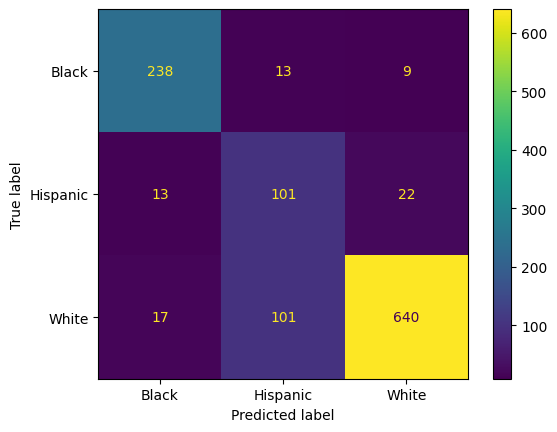

In [928]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

In [936]:
scv_b_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("SVC", SVC(C=0.0001, class_weight='balanced', degree=0, kernel='linear',
    probability=True))]
)

scv_b_p = scv_b_p.set_output(transform='pandas')

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

scv_b_p.fit(X_train, y_train)

y_pred_proba = scv_b_p.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [930]:
y_pred_proba = svm_model_grid.predict_proba(X_test)

In [931]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9081026811510458

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


scv_b_p.fit(X_train, y_train)

y_pred_proba = scv_b_p.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [932]:
from sklearn.metrics import average_precision_score, roc_auc_score, decision_function

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6954301777555204

In [938]:
decision_function = svm_model_grid.decision_function(X_test)

In [939]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6628707482795002

In [940]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [941]:
from sklearn.ensemble import RandomForestClassifier

In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [947]:
ord_e = X_train.select_dtypes("object").columns
ord_e

Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object')

In [948]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)


In [949]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ord_e)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

In [950]:
rf_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(random_state=10))]
)

rf_p = rf_p.set_output(transform='pandas')

In [951]:
rf_p.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF_model', RandomForestClassifier(random_state=10))])

In [952]:
eval_metric(rf_p, X_train, y_train, X_test, y_test)

Test_Set
[[208   3  49]
 [ 19   9 108]
 [ 16   5 737]]
              precision    recall  f1-score   support

       Black       0.86      0.80      0.83       260
    Hispanic       0.53      0.07      0.12       136
       White       0.82      0.97      0.89       758

    accuracy                           0.83      1154
   macro avg       0.74      0.61      0.61      1154
weighted avg       0.80      0.83      0.79      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



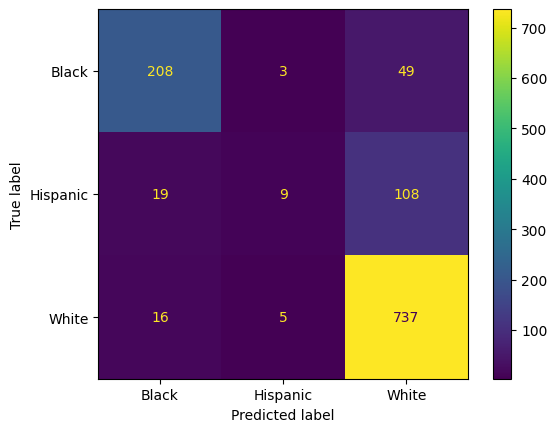

In [953]:
ConfusionMatrixDisplay.from_estimator(rf_p, X_test, y_test);

In [199]:
scores = cross_validate(rf_p,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.813003
train_accuracy           1.000000
test_precision_micro     0.813003
train_precision_micro    1.000000
test_recall_micro        0.813003
train_recall_micro       1.000000
test_f1_micro            0.813003
train_f1_micro           1.000000
dtype: float64

In [246]:
scores = cross_validate(rf_p,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_0     0.813003
train_precision_0    1.000000
test_recall_0        0.813003
train_recall_0       1.000000
test_f1_0            0.118926
train_f1_0           1.000000
dtype: float64

### RF Model GridsearchCV

In [955]:
RandomForestClassifier(class_weight={'White': 1, 'Black': 2, 'Hispanic': 4}, random_state=1).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {'White': 1, 'Black': 2, 'Hispanic': 4},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [956]:
f1_0 = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_0 = make_scorer(precision_score, average = None, pos_label = 'Hispanic', labels =["Hispanic"])
recall_0 = make_scorer(recall_score, average = None, pos_label = 'Hispanic', labels =["Hispanic"])

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [957]:
param_grid = {'RF_model__n_estimators':[200, 400, 500],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             #'min_samples_leaf': [2,3,4],
             #'max_samples':[0.8, 1]
             }

In [958]:
#RF_model = RandomForestClassifier(class_weight={'White': 1, 'Black': 2, 'Hispanic': 4}, random_state=10)


rf_p2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("RF_model", RandomForestClassifier(class_weight='balanced', random_state=10))]
)

rf_p2 = rf_p2.set_output(transform='pandas')

In [959]:

rf_grid_model = GridSearchCV(estimator=rf_p2,
                             param_grid=param_grid,
                             scoring=recall_0,
                             n_jobs=-1)

rf_grid_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sk

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=10))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [200, 400, 500]},
             scoring=make_scorer(recall_score, response_method='predict', average=None, pos_label=Hispanic, labels=['Hispanic']))

In [960]:
rf_grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, n_estimators=400,
                                        random_state=10))])

In [961]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[161  80  19]
 [ 16  81  39]
 [ 53 322 383]]
              precision    recall  f1-score   support

       Black       0.70      0.62      0.66       260
    Hispanic       0.17      0.60      0.26       136
       White       0.87      0.51      0.64       758

    accuracy                           0.54      1154
   macro avg       0.58      0.57      0.52      1154
weighted avg       0.75      0.54      0.60      1154


Train_Set
[[ 687  269   82]
 [  36  384  123]
 [ 219 1296 1519]]
              precision    recall  f1-score   support

       Black       0.73      0.66      0.69      1038
    Hispanic       0.20      0.71      0.31       543
       White       0.88      0.50      0.64      3034

    accuracy                           0.56      4615
   macro avg       0.60      0.62      0.55      4615
weighted avg       0.77      0.56      0.61      4615



In [962]:
rf_p3 = Pipeline(
    steps=[("preprocessor", preprocessor), ("RF_model", RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=400, random_state=10))]
)

rf_p3 = rf_p3.set_output(transform='pandas')

scores = cross_validate(rf_grid_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sk

test_precision_0     0.191263
train_precision_0    0.199758
test_recall_0        0.674276
train_recall_0       0.702065
test_f1_0            0.297847
train_f1_0           0.310972
dtype: float64

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C=0.0001, class_weight='balanced', degree=0, kernel='linear',
    probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [964]:
y_pred_proba = rf_grid_model.predict_proba(X_test)

In [965]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2457512591216445

In [966]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [233]:
from xgboost import XGBClassifier

In [967]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [968]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

In [969]:
ord_e = X_train.select_dtypes('object').columns
ord_e

preprocessor = ColumnTransformer(
    transformers=[  
        ('ord', ordinal_encoder, ord_e)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

In [970]:
xgb_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("XGB_model", XGBClassifier(random_state=101))]
)

xgb_p = xgb_p.set_output(transform='pandas')

In [971]:
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})

In [972]:
xgb_p.fit(X_train, y_train_xgb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=Non...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [973]:
eval_metric(xgb_p, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[229   4  27]
 [ 16  50  70]
 [ 12  13 733]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       260
           1       0.75      0.37      0.49       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [974]:
f1_0 = make_scorer(f1_score, average = None, labels =[1])
precision_0 = make_scorer(precision_score, average = None, labels =[1])
recall_0 = make_scorer(recall_score, average = None, labels =[1])

scoring_xgb = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [478]:
scores = cross_validate(xgb_p,
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_0     0.772985
train_precision_0    1.000000
test_recall_0        0.359327
train_recall_0       1.000000
test_f1_0            0.488516
train_f1_0           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [975]:
param_grid = {"XGB_model__n_estimators":[600, 700, 800],
              'XGB_model__max_depth':[0.5 ,1], 
              "XGB_model__learning_rate": [0.8 ,1],
              "XGB_model__subsample":[0.5, 0.8, 1], 
              "XGB_model__colsample_bytree":[ 0.5, 1]}

In [976]:
xgb_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("XGB_model", XGBClassifier(random_state=101))]
)

xgb_p = xgb_p.set_output(transform='pandas')

In [977]:
xgb_grid_model = GridSearchCV(estimator=xgb_p,
                             param_grid=param_grid,
                             scoring=recall_0,
                             cv=5,
                             n_jobs=-1,
                             return_train_score=True)

xgb_grid_model.fit(X_train, y_train_xgb)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('XGB_model',
                                        XGBClassifier...
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 1],
                         'XGB_model__learning_rate': [0.8, 1],
                         'XGB_model__max_depth': [0.5, 1],
                         'XGB_model__n_estimators': [600, 700, 800],
                         'XGB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=[1]))

In [978]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=Non...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=600,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [979]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 1,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 600,
 'XGB_model__subsample': 0.8}

In [980]:
xgb_grid_model.best_score_

0.46216445803601774

In [981]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[232   8  20]
 [ 12  63  61]
 [ 15  32 711]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       260
           1       0.61      0.46      0.53       136
           2       0.90      0.94      0.92       758

    accuracy                           0.87      1154
   macro avg       0.80      0.76      0.78      1154
weighted avg       0.86      0.87      0.87      1154


Train_Set
[[1035    1    2]
 [   3  494   46]
 [   1    8 3025]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       0.98      0.91      0.94       543
           2       0.98      1.00      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



In [ ]:

xgb_grid_model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [982]:
y_pred_proba = xgb_grid_model.predict_proba(X_test)

In [985]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [983]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5119842084201074

In [987]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

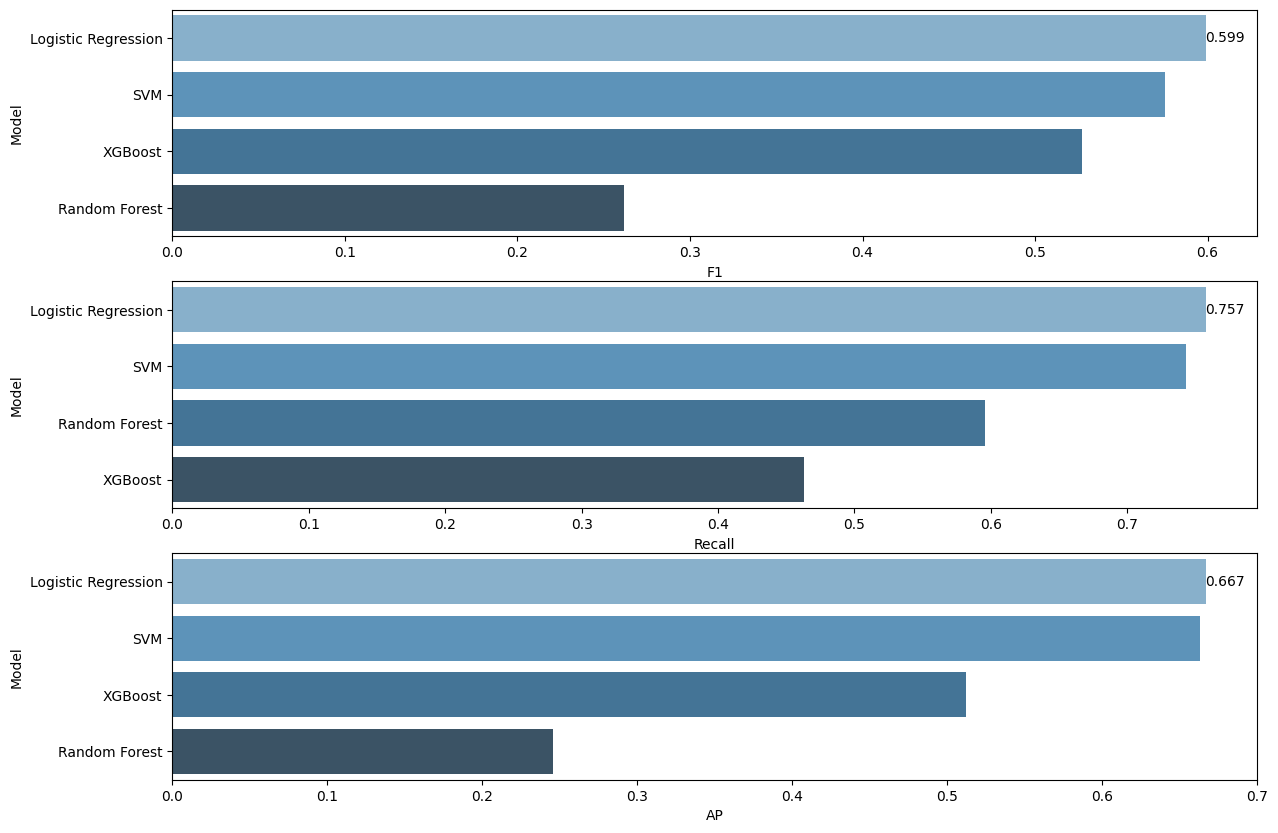

In [988]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [557]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [558]:
ord_e = X_train.select_dtypes('object').columns
ord_e

preprocessor = ColumnTransformer(
    transformers=[  
        ('ord', ordinal_encoder, ord_e)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

In [560]:
X_train_ohe = preprocessor.fit_transform(X_train)

In [561]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

In [562]:
X_train_over.shape

(9102, 90)

In [563]:
y_train_over.value_counts()

dodrace
White       3034
Black       3034
Hispanic    3034
Name: count, dtype: int64

In [564]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [565]:
X_train_under.shape

(1629, 90)

In [566]:
y_train_under.value_counts()


dodrace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [596]:
over = SMOTE(sampling_strategy={"Hispanic": 1500})
under = RandomUnderSampler(sampling_strategy={"White": 2500})


In [597]:
y_train.value_counts()

dodrace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [598]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [599]:
y_resampled_over.value_counts()

dodrace
White       3034
Hispanic    1500
Black       1038
Name: count, dtype: int64

In [600]:
resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [601]:
y_resampled_under.value_counts()

dodrace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [602]:
smote_p = Pipeline(
    steps = [("o", over), ("u", under)]
)

smote_p = smote_p.set_output(transform='pandas')

X_resampled, y_resampled = smote_p.fit_resample(X_train_ohe, y_train)

In [603]:
y_resampled.value_counts()

dodrace
White       2500
Hispanic    1500
Black       1038
Name: count, dtype: int64

In [604]:
y_train.value_counts()

dodrace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

In [605]:
smote_p_l = Pipeline(
    steps = [("preprocessor", preprocessor), ("o", over), ("u", under), ("log", LogisticRegression(max_iter=10000, random_state=101))]
)

smote_p_l = smote_p_l.set_output(transform='pandas')

In [606]:
smote_p_l.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'component', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1500})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [607]:
eval_metric(smote_p_l, X_train, y_train, X_test, y_test)

Test_Set
[[234  15  11]
 [ 15  72  49]
 [  5  89 664]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.41      0.53      0.46       136
       White       0.92      0.88      0.90       758

    accuracy                           0.84      1154
   macro avg       0.75      0.77      0.76      1154
weighted avg       0.86      0.84      0.85      1154


Train_Set
[[ 929   61   48]
 [  41  353  149]
 [  40  350 2644]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.91      1038
    Hispanic       0.46      0.65      0.54       543
       White       0.93      0.87      0.90      3034

    accuracy                           0.85      4615
   macro avg       0.77      0.81      0.78      4615
weighted avg       0.87      0.85      0.86      4615



In [609]:
f1_0 = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_0 = make_scorer(precision_score, average = None, pos_label = 'Hispanic', labels =["Hispanic"])
recall_0 = make_scorer(recall_score, average = None, pos_label = 'Hispanic', labels =["Hispanic"])

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [610]:
scores = cross_validate(
    smote_p_l, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that

test_precision_0     0.420893
train_precision_0    0.471388
test_recall_0        0.592963
train_recall_0       0.657455
test_f1_0            0.491266
train_f1_0           0.549065
dtype: float64

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [744]:
onehot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)

In [745]:
one_e = X_train.select_dtypes('object').columns
one_e

preprocessor_shap = ColumnTransformer(
    transformers=[  
        ('one', onehot_encoder, one_e)
    ],
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False)

preprocessor_shap = preprocessor_shap.set_output(transform="pandas")


X_train_trans = preprocessor_shap.fit_transform(X_train)
X_test_trans = preprocessor_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga"
)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [748]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[241   9  10]
 [ 15 101  20]
 [ 15  90 653]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.51      0.74      0.60       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  15  460   68]
 [  75  347 2612]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [749]:
shap_p = Pipeline(
    steps = [("preprocessor", preprocessor_shap), ("log", LogisticRegression(C=0.05, class_weight='balanced', max_iter=15000,random_state=101))]
)

shap_p = shap_p.set_output(transform='pandas')

scores = cross_validate(
    shap_p, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hisp

test_precision_0     0.452727
train_precision_0    0.468965
test_recall_0        0.740435
train_recall_0       0.783147
test_f1_0            0.561861
train_f1_0           0.586572
dtype: float64

In [750]:
features = preprocessor_shap.get_feature_names_out()
features

array(['gender_Male', 'component_Army Reserve', 'component_Regular Army',
       'subjectsbirthlocation_Alaska',
       'subjectsbirthlocation_Antigua and Barbuda',
       'subjectsbirthlocation_Arizona', 'subjectsbirthlocation_Arkansas',
       'subjectsbirthlocation_Azerbaijan',
       'subjectsbirthlocation_Barbados', 'subjectsbirthlocation_Belarus',
       'subjectsbirthlocation_Belgium', 'subjectsbirthlocation_Belize',
       'subjectsbirthlocation_Bermuda', 'subjectsbirthlocation_Bolivia',
       'subjectsbirthlocation_Bosnia and Herzegovina',
       'subjectsbirthlocation_British Virgin Islands',
       'subjectsbirthlocation_Bulgaria',
       'subjectsbirthlocation_California',
       'subjectsbirthlocation_Cameroon', 'subjectsbirthlocation_Canada',
       'subjectsbirthlocation_Cape Verde',
       'subjectsbirthlocation_Colombia', 'subjectsbirthlocation_Colorado',
       'subjectsbirthlocation_Connecticut',
       'subjectsbirthlocation_Costa Rica', 'subjectsbirthlocation_Cuba

In [679]:
import shap

In [751]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

contrubution = pd.DataFrame(np.abs(shap_values[:, :, :].mean(axis=0)), index=features, columns=["Black", "Hispanic", "White"])
contrubution["total"] = contrubution.sum(axis=1)
contrubution.tail(15)

Black  Hispanic     White     total
thumbtipreach                  0.005941  0.000000  0.000000  0.005941
tibialheight                   0.000000  0.000000  0.000000  0.000000
tragiontopofhead               0.000700  0.003829  0.000000  0.004528
trochanterionheight            0.007257  0.000000  0.000000  0.007257
verticaltrunkcircumferenceusa  0.000000  0.000000  0.000658  0.000658
waistbacklength                0.000000  0.000000  0.000000  0.000000
waistbreadth                   0.034113  0.000000  0.013367  0.047481
waistcircumference             0.000000  0.000000  0.000000  0.000000
waistdepth                     0.044790  0.000000  0.000000  0.044790
waistfrontlengthsitting        0.000884  0.000000  0.003311  0.004195
waistheightomphalion           0.000000  0.000000  0.000000  0.000000
weightkg                       0.000000  0.000000  0.000000  0.000000
wristcircumference             0.000000  0.003652  0.007793  0.011445
wristheight                    0.000000  0.000000  0.016079  0.016079
age                            0.023118  0.021125  0.000000  0.044243

## SHAP values for Feature Selection (train data)

In [752]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_train_trans)

contrubution = pd.DataFrame(np.abs(shap_values[:, :, :].mean(axis=0)), index=features, columns=["Black", "Hispanic", "White"])
contrubution["total"] = contrubution.sum(axis=1)
contrubution.tail(15)

Black  Hispanic     White     total
thumbtipreach                  0.003468  0.000000  0.000000  0.003468
tibialheight                   0.000000  0.000000  0.000000  0.000000
tragiontopofhead               0.000034  0.000188  0.000000  0.000223
trochanterionheight            0.004332  0.000000  0.000000  0.004332
verticaltrunkcircumferenceusa  0.000000  0.000000  0.001450  0.001450
waistbacklength                0.000000  0.000000  0.000000  0.000000
waistbreadth                   0.059511  0.000000  0.023320  0.082831
waistcircumference             0.000000  0.000000  0.000000  0.000000
waistdepth                     0.047890  0.000000  0.000000  0.047890
waistfrontlengthsitting        0.000004  0.000000  0.000013  0.000017
waistheightomphalion           0.000000  0.000000  0.000000  0.000000
weightkg                       0.000000  0.000000  0.000000  0.000000
wristcircumference             0.000000  0.001273  0.002718  0.003991
wristheight                    0.000000  0.000000  0.013304  0.013304
age                            0.025226  0.023051  0.000000  0.048277

In [753]:
contrubution

Black  Hispanic     White  \
gender_Male                                   0.061928  0.000000  0.015281   
component_Army Reserve                        0.000000  0.000000  0.009212   
component_Regular Army                        0.012833  0.000381  0.000000   
subjectsbirthlocation_Alaska                  0.000000  0.000000  0.000000   
subjectsbirthlocation_Antigua and Barbuda     0.000000  0.000000  0.000000   
subjectsbirthlocation_Arizona                 0.000699  0.003006  0.000000   
subjectsbirthlocation_Arkansas                0.001819  0.004762  0.000000   
subjectsbirthlocation_Azerbaijan              0.000000  0.000000  0.000000   
subjectsbirthlocation_Barbados                0.000000  0.000000  0.000000   
subjectsbirthlocation_Belarus                 0.000000  0.000000  0.000000   
subjectsbirthlocation_Belgium                 0.000000  0.000000  0.000000   
subjectsbirthlocation_Belize                  0.000000  0.000000  0.000000   
subjectsbirthlocation_Bermuda                 0.000000  0.000000  0.000000   
subjectsbirthlocation_Bolivia                 0.000000  0.000927  0.000000   
subjectsbirthlocation_Bosnia and Herzegovina  0.000000  0.000000  0.000000   
subjectsbirthlocation_British Virgin Islands  0.000000  0.000000  0.000000   
subjectsbirthlocation_Bulgaria                0.000000  0.000000  0.000000   
subjectsbirthlocation_California              0.000000  0.026692  0.004149   
subjectsbirthlocation_Cameroon                0.000000  0.000000  0.000000   
subjectsbirthlocation_Canada                  0.000000  0.000000  0.000000   
subjectsbirthlocation_Cape Verde              0.000000  0.000000  0.000000   
subjectsbirthlocation_Colombia                0.000000  0.009925  0.000000   
subjectsbirthlocation_Colorado                0.000000  0.008397  0.003784   
subjectsbirthlocation_Connecticut             0.000000  0.007255  0.002545   
subjectsbirthlocation_Costa Rica              0.000000  0.001645  0.000000   
subjectsbirthlocation_Cuba                    0.000000  0.001860  0.000000   
subjectsbirthlocation_Delaware                0.000000  0.000000  0.000000   
subjectsbirthlocation_Denmark                 0.000000  0.000000  0.000000   
subjectsbirthlocation_District of Columbia    0.000000  0.000855  0.002627   
subjectsbirthlocation_Dominica                0.000000  0.000000  0.000000   
subjectsbirthlocation_Dominican Republic      0.000000  0.010943  0.000000   
subjectsbirthlocation_Ecuador                 0.000000  0.001224  0.000000   
subjectsbirthlocation_Egypt                   0.000000  0.000000  0.000000   
subjectsbirthlocation_El Salvador             0.000000  0.002838  0.000000   
subjectsbirthlocation_Ethiopia                0.000186  0.000000  0.000000   
subjectsbirthlocation_Florida                 0.000000  0.002945  0.009822   
subjectsbirthlocation_France                  0.000000  0.000000  0.000000   
subjectsbirthlocation_French Guiana           0.000000  0.000376  0.000000   
subjectsbirthlocation_Georgia                 0.002704  0.000000  0.008914   
subjectsbirthlocation_Germany                 0.007490  0.000000  0.009799   
subjectsbirthlocation_Ghana                   0.000000  0.000000  0.000000   
subjectsbirthlocation_Grenada                 0.000076  0.000000  0.000000   
subjectsbirthlocation_Guam                    0.000000  0.000000  0.000000   
subjectsbirthlocation_Guatemala               0.000000  0.000118  0.000000   
subjectsbirthlocation_Guyana                  0.000000  0.000000  0.000000   
subjectsbirthlocation_Haiti                   0.000303  0.000000  0.000000   
subjectsbirthlocation_Hawaii                  0.001080  0.000000  0.000000   
subjectsbirthlocation_Honduras                0.000000  0.003171  0.000000   
subjectsbirthlocation_Idaho                   0.000000  0.000196  0.000000   
subjectsbirthlocation_Illinois                0.000000  0.024235  0.003854   
subjectsbirthlocation_India                   0.000000  0.000000  0.000

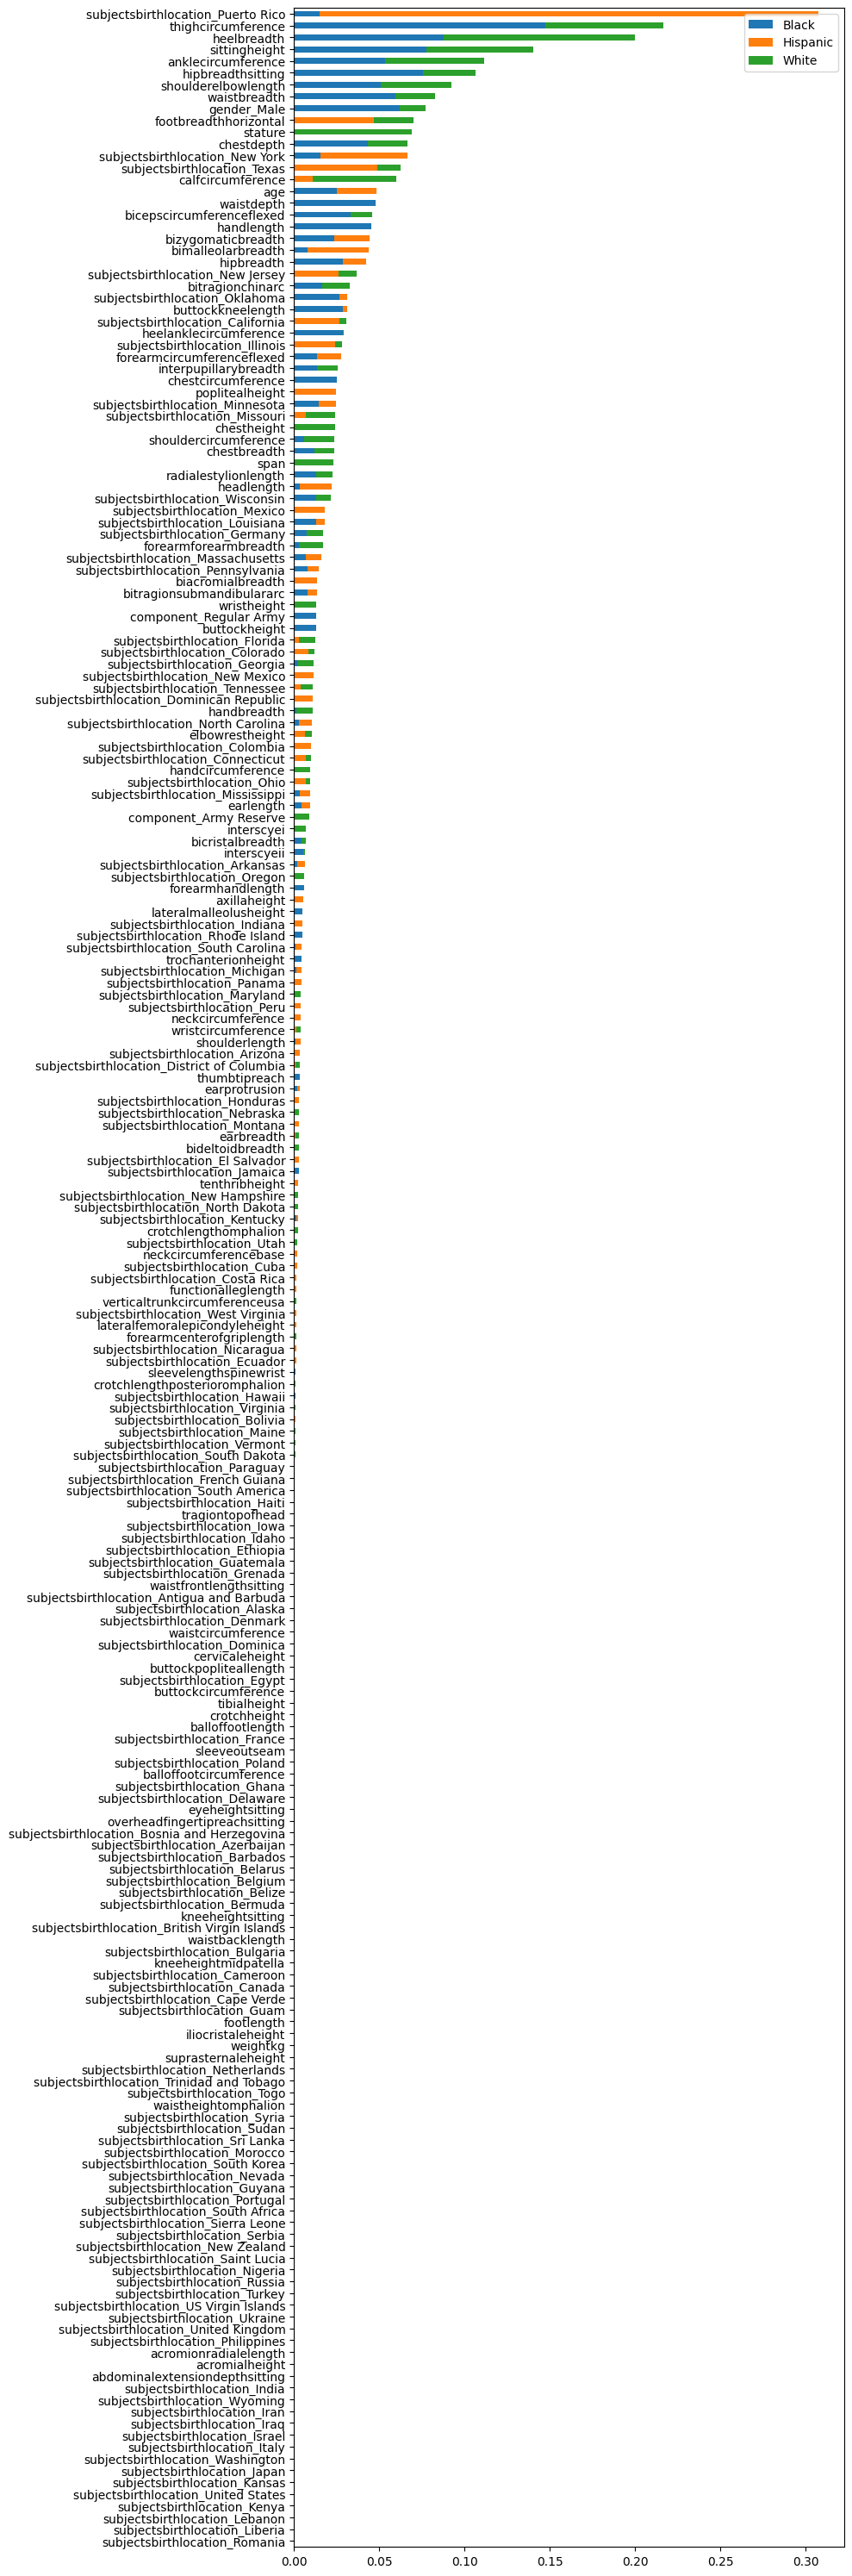

In [754]:
contrubution.sort_values(by="total").iloc[:, :-1].plot.barh(figsize=(10,30), stacked=True)
plt.legend(loc='upper right')
plt.tight_layout()

In [757]:
hispanic = [
    "subjectsbirthlocation",
    "anklecircumference",
    "calfcircumference",
    "bimalleolarbreadth",
    "waistbreadth",
    "waistdepth",
    "footbreadthhorizontal",
    "forearmcircumferenceflexed",
    "headlength",
    "bizygomaticbreadth",
    "poplitealheight",
    "buttockkneelength",
    "earlength",
    "balloffootcircumference",
    "waistcircumference",
    "crotchlengthomphalion"
    ]

In [758]:
X2 = X[hispanic]
X2.head()

subjectsbirthlocation  anklecircumference  calfcircumference  \
0               Germany                 204                360   
1            California                 207                350   
2                 Texas                 233                384   
3  District of Columbia                 214                372   
4                 Texas                 214                433   

   bimalleolarbreadth  waistbreadth  waistdepth  footbreadthhorizontal  \
0                  65           295         217                     91   
1                  64           254         168                     91   
2                  69           269         159                    100   
3                  68           302         235                     97   
4                  67           405         300                     88   

   forearmcircumferenceflexed  headlength  bizygomaticbreadth  \
0                         265         191                 141   
1                         247         180                 126   
2                         262         207                 128   
3                         309         206                 144   
4                         260         181                 135   

   poplitealheight  buttockkneelength  earlength  balloffootcircumference  \
0              362                587         65                      222   
1              426                583         60                      225   
2              398                583         65                      237   
3              394                599         62                      240   
4              345                607         65                      217   

   waistcircumference  crotchlengthomphalion  
0                 850                    557  
1                 708                    549  
2                 727                    643  
3                 923                    640  
4                1163                    686

In [759]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['subjectsbirthlocation'], dtype='object')

In [760]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

In [761]:
preprocessor_shap = ColumnTransformer(
    transformers=[  
        ('ord', ordinal_encoder, cat_new)
    ],
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False)

preprocessor_shap = preprocessor_shap.set_output(transform="pandas")

pipe_shap_model = Pipeline(
    steps = [("preprocessor", preprocessor_shap), ("log", LogisticRegression(C=0.05, class_weight='balanced', max_iter=15000,random_state=101))]
)

pipe_shap_model = pipe_shap_model.set_output(transform='pandas')

pipe_shap_model.fit(X_train2, y_train2)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.05, class_weight='balanced',
                                    max_iter=15000, random_state=101))])

In [762]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[192  36  32]
 [ 19  90  27]
 [176 236 346]]
              precision    recall  f1-score   support

       Black       0.50      0.74      0.59       260
    Hispanic       0.25      0.66      0.36       136
       White       0.85      0.46      0.60       758

    accuracy                           0.54      1154
   macro avg       0.53      0.62      0.52      1154
weighted avg       0.70      0.54      0.57      1154


Train_Set
[[ 767  144  127]
 [  72  344  127]
 [ 709  901 1424]]
              precision    recall  f1-score   support

       Black       0.50      0.74      0.59      1038
    Hispanic       0.25      0.63      0.36       543
       White       0.85      0.47      0.60      3034

    accuracy                           0.55      4615
   macro avg       0.53      0.61      0.52      4615
weighted avg       0.70      0.55      0.57      4615



In [704]:
scores = cross_validate(
    pipe_shap_model, X_train2, y_train2, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1569: UserWarning: Note that pos_label (set to 'Hispanic') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

test_precision_0     0.240361
train_precision_0    0.241315
test_recall_0        0.631481
train_recall_0       0.633721
test_f1_0            0.347942
train_f1_0           0.349524
dtype: float64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___